In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
import pandas as pd
df = pd.read_csv("candy.csv")

In [3]:
df

,id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,NaN,0.860,66.971725
1,1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,NaN,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519
81,81,Werther's Original Caramel,No,No,Yes,No,No,No,Yes,No,No,0.186,0.267,41.904308


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                83 non-null     int64  
 1   competitorname    83 non-null     object 
 2   chocolate         83 non-null     object 
 3   fruity            83 non-null     object 
 4   caramel           83 non-null     object 
 5   peanutyalmondy    83 non-null     object 
 6   nougat            83 non-null     object 
 7   crispedricewafer  83 non-null     object 
 8   hard              83 non-null     object 
 9   bar               83 non-null     object 
 10  pluribus          83 non-null     object 
 11  sugarpercent      81 non-null     float64
 12  pricepercent      83 non-null     float64
 13  winpercent        83 non-null     float64
dtypes: float64(3), int64(1), object(10)
memory usage: 9.2+ KB


In [5]:
df.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        2
pricepercent        0
winpercent          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for i in df.columns:
  if i in df.select_dtypes("object").columns:
    df[i] = LabelEncoder.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                81 non-null     int64  
 1   competitorname    81 non-null     int64  
 2   chocolate         81 non-null     int64  
 3   fruity            81 non-null     int64  
 4   caramel           81 non-null     int64  
 5   peanutyalmondy    81 non-null     int64  
 6   nougat            81 non-null     int64  
 7   crispedricewafer  81 non-null     int64  
 8   hard              81 non-null     int64  
 9   bar               81 non-null     int64  
 10  pluribus          81 non-null     int64  
 11  sugarpercent      81 non-null     float64
 12  pricepercent      81 non-null     float64
 13  winpercent        81 non-null     float64
dtypes: float64(3), int64(11)
memory usage: 9.5 KB
None


In [9]:
X = df.drop('bar', axis=1)

In [10]:
y = df['bar']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105, shuffle=True)


In [12]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(6,12), max_iter=100)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [15]:
acc = accuracy_score(y_test, predictions)
acc

0.8

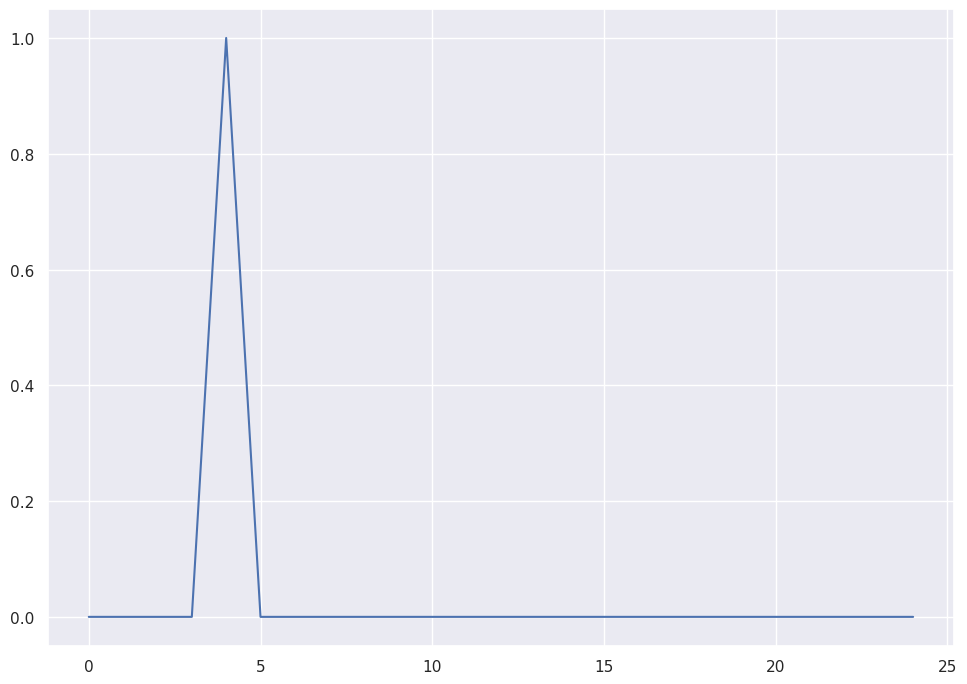

In [16]:
plt.plot(predictions)

<BarContainer object of 25 artists>

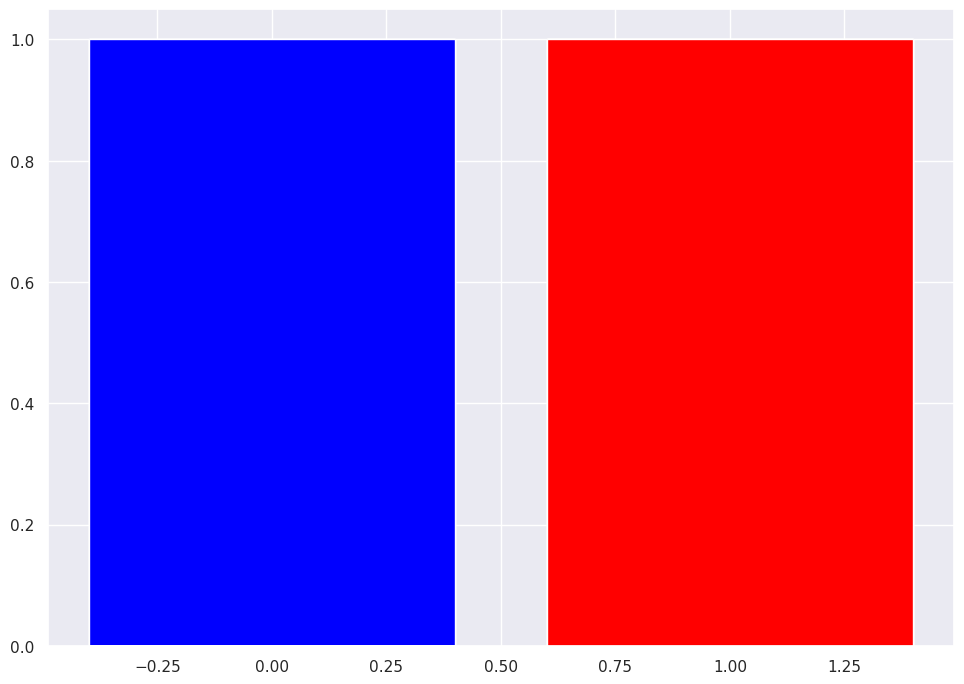

In [17]:
plt.bar(predictions, y_test, color = 'blue')
plt.bar(y_test, y_test, color = 'red')

## MLP Classifier

In [18]:
df1 = pd.read_csv("candy.csv")
df1

,id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,NaN,0.860,66.971725
1,1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,NaN,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519
81,81,Werther's Original Caramel,No,No,Yes,No,No,No,Yes,No,No,0.186,0.267,41.904308


In [19]:
df1.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        2
pricepercent        0
winpercent          0
dtype: int64

In [20]:
df1.dropna(inplace=True)

In [21]:
df1.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for i in df1.columns:
  if i in df1.select_dtypes("object").columns:
    df1[i] = LabelEncoder.fit_transform(df1[i])

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                81 non-null     int64  
 1   competitorname    81 non-null     int64  
 2   chocolate         81 non-null     int64  
 3   fruity            81 non-null     int64  
 4   caramel           81 non-null     int64  
 5   peanutyalmondy    81 non-null     int64  
 6   nougat            81 non-null     int64  
 7   crispedricewafer  81 non-null     int64  
 8   hard              81 non-null     int64  
 9   bar               81 non-null     int64  
 10  pluribus          81 non-null     int64  
 11  sugarpercent      81 non-null     float64
 12  pricepercent      81 non-null     float64
 13  winpercent        81 non-null     float64
dtypes: float64(3), int64(11)
memory usage: 9.5 KB
None


In [23]:
X1 = df1.drop('bar', axis = 1)

In [24]:
y1 = df1['bar']

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, shuffle=True, random_state=105)

In [26]:
ss = StandardScaler()
X1_train = ss.fit_transform(X1_train)
X1_test = ss.transform(X1_test)

In [27]:
mlp1 = MLPRegressor(hidden_layer_sizes=(10,20), activation='relu', solver='adam', alpha=0.001)
mlp1.fit(X1_train, y1_train)
predictions1 = mlp.predict(X1_test)

In [28]:
predictions1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
acc = accuracy_score(predictions1, y1_test)
print("accuracy", acc)
mse = mean_squared_error(y1_test, predictions1)
print("mse:", mse)
rmse = np.sqrt(mse)
print("Rmse:", rmse)
mae = mean_absolute_error(y1_test, predictions1)
print("mae:", mae)

accuracy 0.8571428571428571
mse: 0.14285714285714285
Rmse: 0.3779644730092272
mae: 0.14285714285714285


<BarContainer object of 21 artists>

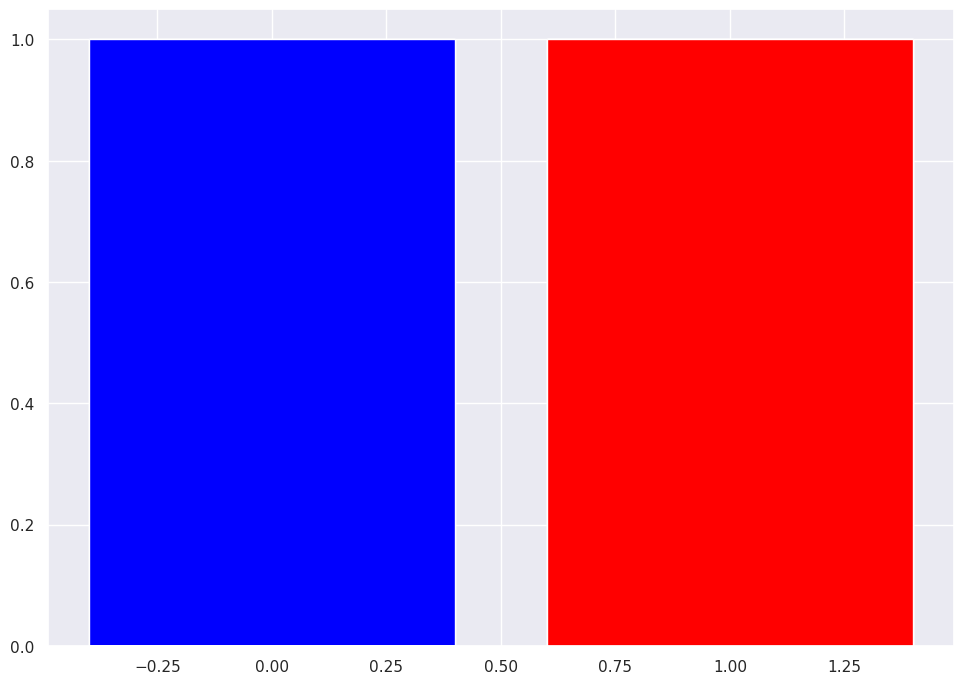

In [30]:
plt.bar(predictions1, y1_test, color = 'blue')
plt.bar(y1_test, y1_test, color = 'red')

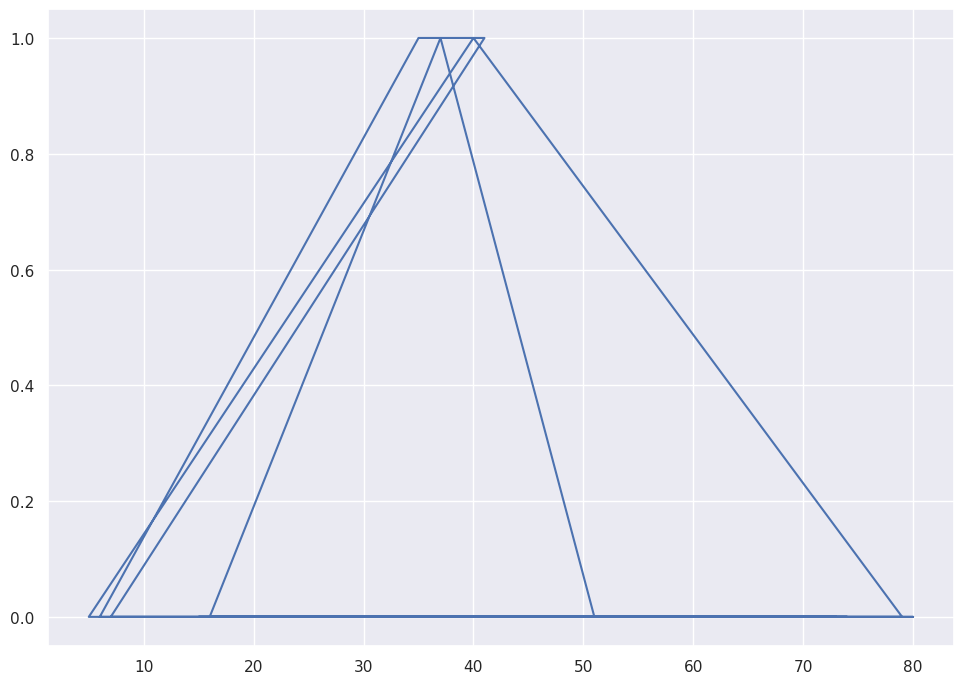

In [31]:
plt.plot(y1_test)